<a href="https://colab.research.google.com/github/sayan0506/Product-Matching/blob/main/Product_Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install dependencies**

In [2]:
# used for image augmentations
!pip install --upgrade imgaug
!pip install imagecorruptions

     |████████████████████████████████| 948 kB 5.0 MB/s 
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.4.0 which is incompatible.
     |████████████████████████████████| 2.1 MB 5.4 MB/s 


**Download the product dataset zipfile**

In [ ]:
!wget https://storage.googleapis.com/metric-misc/infilect_dataset.zip

--2021-10-22 05:57:03--  https://storage.googleapis.com/metric-misc/infilect_dataset.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 142.251.8.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2164035919 (2.0G) [application/zip]
Saving to: ‘infilect_dataset.zip’

infilect_dataset.zi 100%[===================>]   2.01G  88.1MB/s    in 41s     

2021-10-22 05:57:45 (50.2 MB/s) - ‘infilect_dataset.zip’ saved [2164035919/2164035919]



**Unzip the dataset**

In [ ]:
!unzip /content/infilect_dataset.zip

## **Import Dependencies**

In [29]:
from matplotlib import pyplot as plt
import os
import pandas as pd
from keras_preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
import imgaug.augmenters as iaa

from sklearn.model_selection import train_test_split

**Mount the drive**

This contains yolov4 trained weights

id: hazrasayan2019@gmail.com

drive link: https://drive.google.com/drive/u/3/folders/1-5JMvg068iHX-BlH5jtUUKMtwHmUFwhC

In [3]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


## **Data Preperation**


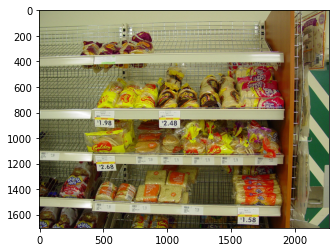

In [ ]:
# sample shelf image
shelf_img_path = '/content/infilect_dataset/shelf_images/db1.jpg'
plt.imshow(plt.imread(shelf_img_path))

## **Object Deetection using Yolov4**

Using the pretrained model from roboflow and my own fine-tuned one using product images

**Prepare yolov4 environment**

In [ ]:
!pwd

/content


In [ ]:
# clone Scaled_YOLOv4
!git clone https://github.com/roboflow-ai/ScaledYOLOv4.git # clone repo
%cd /content/ScaledYOLOv4
#checkout the yolov4-large branch
!git checkout yolov4-large

Cloning into 'ScaledYOLOv4'...
remote: Enumerating objects: 128, done.
remote: Total 128 (delta 0), reused 0 (delta 0), pack-reused 128
Receiving objects: 100% (128/128), 389.37 KiB | 2.48 MiB/s, done.
Resolving deltas: 100% (39/39), done.
/content/ScaledYOLOv4
Branch 'yolov4-large' set up to track remote branch 'yolov4-large' from 'origin'.
Switched to a new branch 'yolov4-large'


In [ ]:
#install mish activation function for cuda
%cd /content/
!git clone https://github.com/JunnYu/mish-cuda
%cd mish-cuda
!python setup.py build install

In [ ]:
# install pyYaml
!pip install -U PyYAML

     |████████████████████████████████| 596 kB 2.8 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


**Store the detected results**

In [ ]:
!python /content/ScaledYOLOv4/detect.py --weights /content/drive/MyDrive/yolov4/runs/exp6_yolov4-p5-results/weights/last_yolov4-p5-results_strip.pt --source /content/infilect_dataset/shelf_images --output /content/detect_result --img-size 896 --save-txt

## **Define the classification task**


In [5]:
# this is an important module to use to serialize the image names in proper sorted order
from natsort import natsorted

**Load product images**

In [6]:
# find product images
product_path = '/content/drive/MyDrive/product_images/'
# fetch product image list
img_list = natsorted(os.listdir(product_path))
print(img_list)

['qr1.jpg', 'qr2.jpg', 'qr3.jpg', 'qr4.jpg', 'qr5.jpg', 'qr6.jpg', 'qr7.jpg', 'qr8.jpg', 'qr9.jpg', 'qr10.jpg', 'qr11.jpg', 'qr12.jpg', 'qr13.jpg', 'qr14.jpg', 'qr15.jpg', 'qr16.jpg', 'qr17.jpg', 'qr18.jpg', 'qr19.jpg', 'qr20.jpg', 'qr21.jpg', 'qr22.jpg', 'qr23.jpg', 'qr24.jpg', 'qr25.jpg', 'qr26.jpg', 'qr27.jpg', 'qr28.jpg', 'qr29.jpg', 'qr30.jpg', 'qr31.jpg', 'qr32.jpg', 'qr33.jpg', 'qr34.jpg', 'qr35.jpg', 'qr36.jpg', 'qr37.jpg', 'qr38.jpg', 'qr39.jpg', 'qr40.jpg', 'qr41.jpg', 'qr42.jpg', 'qr43.jpg', 'qr44.jpg', 'qr45.jpg', 'qr46.jpg', 'qr47.jpg', 'qr48.jpg', 'qr49.jpg', 'qr50.jpg', 'qr51.jpg', 'qr52.jpg', 'qr53.jpg', 'qr54.jpg', 'qr55.jpg', 'qr56.jpg', 'qr57.jpg', 'qr58.jpg', 'qr59.jpg', 'qr60.jpg', 'qr61.jpg', 'qr62.jpg', 'qr63.jpg', 'qr64.jpg', 'qr65.jpg', 'qr66.jpg', 'qr67.jpg', 'qr68.jpg', 'qr69.jpg', 'qr70.jpg', 'qr71.jpg', 'qr72.jpg', 'qr73.jpg', 'qr74.jpg', 'qr75.jpg', 'qr76.jpg', 'qr77.jpg', 'qr78.jpg', 'qr79.jpg', 'qr80.jpg', 'qr81.jpg', 'qr82.jpg', 'qr83.jpg', 'qr84.jpg', 

#### **Define the dataset containing 100 categories**

Define the dataframe to load the images

In [7]:
class_labels = [i for i in range(1,101)]
img_name = img_list[0]
cls_id = 0
img_df = pd.DataFrame(columns = ['img_path', 'cls_id'])
for img_id, img in enumerate(img_list):
  img_path = os.path.join(product_path, img)
  id = (int(img.split('.')[0].split('qr')[1]))
  if (id-1)!=0 and (id-1)%3==0:
    cls_id+=1
    img_df.loc[img_id, 'img_path'] = img_path
    img_df.loc[img_id, 'cls_id'] = str(class_labels[cls_id])

  else:
    img_df.loc[img_id, 'img_path'] = img_path
    img_df.loc[img_id, 'cls_id'] = str(class_labels[cls_id])

# print the dataset
img_df

,img_path,cls_id
0,/content/drive/MyDrive/product_images/qr1.jpg,1
1,/content/drive/MyDrive/product_images/qr2.jpg,1
2,/content/drive/MyDrive/product_images/qr3.jpg,1
3,/content/drive/MyDrive/product_images/qr4.jpg,2
4,/content/drive/MyDrive/product_images/qr5.jpg,2
...,...,...
295,/content/drive/MyDrive/product_images/qr296.jpg,99
296,/content/drive/MyDrive/product_images/qr297.jpg,99
297,/content/drive/MyDrive/product_images/qr298.jpg,100
298,/content/drive/MyDrive/product_images/qr299.jpg,100


## **Define Data Preperation**

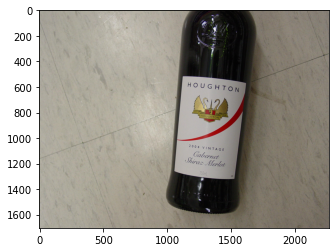

In [9]:
plt.imshow(plt.imread(img_df['img_path'][0]))

**Define images and labels list**

Images are loaded to list by center-cropping to (1200,1200)

In [10]:
#img_path_list = [plt.imread(path) for path in img_df['img_path']]
img_list = []
labels_list = []
# define cropped_dimension
(w,h) = (1200,1200)
for img_id_, path in enumerate(img_df['img_path']):
  img_ = plt.imread(path)
  center = [el/2 for el in img_.shape[:2]]
  #print(center)
  x = center[1] - w/2
  y = center[0] - h/2
  img_ = img_[int(y):int(y+h), int(x):int(x+w)]
  img_ = tf.keras.preprocessing.image.smart_resize(img_, size = (256,256), interpolation='bicubic')
  # this maintains(normalizes) the pixel values between 0 and 1
  img_-=img_.min()
  img_/=(img_.max()-img_.min())
  # append images in a list
  img_list.append(img_)
  labels_list.append(img_df['cls_id'][img_id_])

**Visualize images**

Visualize 30 sample images

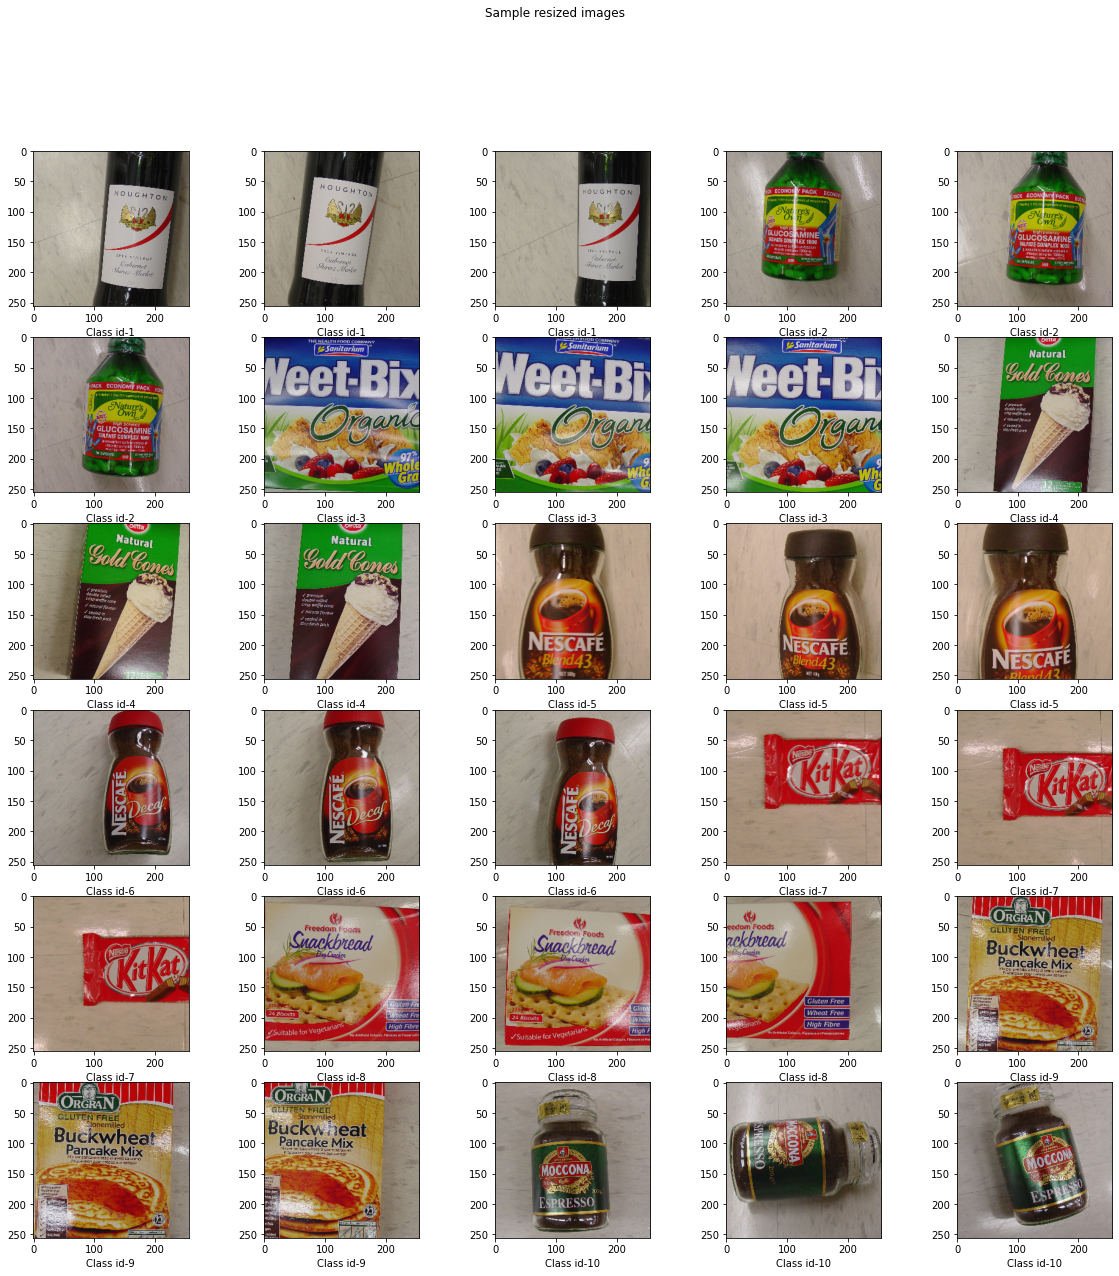

In [11]:
# plot 30 sample images
fig = plt.figure(figsize=(20,20))
fig.suptitle('Sample resized images')
for i in range(30):
  fig.add_subplot(6,5,i+1)
  plt.imshow(img_list[i])
  plt.xlabel(f'Class id-{labels_list[i]}')

**Convert train image and labels to numpy array**

In [12]:
img_array = np.array(img_list, dtype = np.float32)
label_array = np.array(labels_list, dtype = np.int32)

print(f'Dataset shape {img_array.shape, label_array.shape}')
print(f'Dataset dtype {img_array.dtype, label_array.dtype}')

Dataset shape ((300, 256, 256, 3), (300,))
Dataset dtype (dtype('float32'), dtype('int32'))


**Define data augmentation functions on the dataset**

For data augmentation we use image-augmentor module, where we utilized the following functionalities-

* Auto-contrast
* Auto-sharpness
* Auto-rotate(-10 t +10 deg)
* Auto-enhance color
* Auto equalize hist

1st apply all on ooriginal image, then applied all on rotated image, so we obtain 10 augmented samples

In [13]:
def convert(img, target_type_min, target_type_max, target_type):
    imin = img.min()
    imax = img.max()

    a = (target_type_max - target_type_min) / (imax - imin)
    b = target_type_max - a * imax
    new_img = (a * img + b).astype(target_type)
    new_img
    return new_img

# image aug function for the dataset having the specified class index
def img_aug(dataset,label, class_idx = 0):
  # fetch the index of the given class idx
  idx_list = [i for i,j in enumerate(label) if j==class_idx]

  # define augmentor objects for auto_contrast, flip with prob=1
  auto_contrast = iaa.pillike.Autocontrast()
  # auto-brightness
  auto_brightness = iaa.imgcorruptlike.Brightness()
  # auto-sharpness
  sharpness = iaa.pillike.EnhanceSharpness()
  # auto-rotate
  rotate = iaa.Rotate(rotate = (-10,10), order=1)
  eq = iaa.pillike.Equalize()
  ec = iaa.pillike.EnhanceColor()

  img_list = list(dataset)

  # augmented images list initialized with dataset
  aug_list = img_list
  # augmented label list initiallized with dataset
  aug_label_list = list(label)
  
  for idx in idx_list:
    img = img_list[idx]
    
    # auto contrast
    img_con = convert(img,0,255,np.uint8)
    img_con = auto_contrast.augment_image(img_con)
    img_con = convert(img_con,0,1,np.float32)
    aug_list.append(img_con)
    aug_label_list.append(class_idx)
    
    # auto-brightness
    img_b = convert(img,0,255,np.uint8)
    img_b = auto_brightness.augment_image(img_b)
    img_b = convert(img_b,0,1,np.float32)
    aug_list.append(img_b)
    aug_label_list.append(class_idx)

    # auto-sharpness
    img_s = convert(img,0,255,np.uint8)
    img_s = sharpness.augment_image(img_s)
    img_s = convert(img_s,0,1,np.float32)
    aug_list.append(img_s)
    aug_label_list.append(class_idx)

    # auto-equalize
    img_eq = convert(img,0,255,np.uint8)
    img_eq = eq.augment_image(img_eq)
    img_eq = convert(img_eq,0,1,np.float32)
    aug_list.append(img_eq)
    aug_label_list.append(class_idx)

    # auto-enhance color
    img_ec = convert(img,0,255,np.uint8)
    img_ec = ec.augment_image(img_ec)
    img_ec = convert(img_ec,0,1,np.float32)
    aug_list.append(img_ec)
    aug_label_list.append(class_idx)

    # auto-rotate
    img_r = convert(img,0,255,np.uint8)
    img_r = rotate.augment_image(img_r)
    img_r = convert(img_r,0,1,np.float32)
    aug_list.append(img_r)
    aug_label_list.append(class_idx)

    # auto contrast
    img_con = convert(img_r,0,255,np.uint8)
    img_con = auto_contrast.augment_image(img_con)
    img_con = convert(img_con,0,1,np.float32)
    aug_list.append(img_con)
    aug_label_list.append(class_idx)
    
    # auto-brightness
    img_b = convert(img_r,0,255,np.uint8)
    img_b = auto_brightness.augment_image(img_b)
    img_b = convert(img_b,0,1,np.float32)
    aug_list.append(img_b)
    aug_label_list.append(class_idx)

    # auto-sharpness
    img_s = convert(img_r,0,255,np.uint8)
    img_s = sharpness.augment_image(img_s)
    img_s = convert(img_s,0,1,np.float32)
    aug_list.append(img_s)
    aug_label_list.append(class_idx)

    # auto-equalize
    img_eq = convert(img_r,0,255,np.uint8)
    img_eq = eq.augment_image(img_eq)
    img_eq = convert(img_eq,0,1,np.float32)
    aug_list.append(img_eq)
    aug_label_list.append(class_idx)

    # auto-enhance color
    img_ec = convert(img_r,0,255,np.uint8)
    img_ec = ec.augment_image(img_ec)
    img_ec = convert(img_ec,0,1,np.float32)
    aug_list.append(img_ec)
    aug_label_list.append(class_idx)

  aug_img_array = np.array(aug_list, dtype=np.float32)
  # normalize the values between 0 and 1
  aug_img_array = aug_img_array - aug_img_array.min()
  aug_label_list_array = np.array(aug_label_list, dtype=np.int32) 
  
  assert aug_img_array.shape[0] == aug_label_list_array.shape[0]
  
  return aug_img_array, aug_label_list_array

**Apply Data Augmentation**

In [17]:
# obtain augmented image and labels pair for all the classes
for cls in class_labels:
  if cls==1:
    aug_img, aug_label = img_aug(img_array, label_array, class_idx=cls)
  else:
    aug_img, aug_label = img_aug(aug_img, aug_label, class_idx=cls)

In [19]:
print(f'Augmented Dataset shape {aug_img.shape, aug_label.shape}')
print(f'Augmented dtype {aug_img.dtype, aug_label.dtype}')

Augmented Dataset shape ((3600, 256, 256, 3), (3600,))
Augmented dtype (dtype('float32'), dtype('int32'))


**Class-wise distribution**

In [23]:
print(f'Total images correponding to individual categories after augmentation {list(aug_label).count(1)}')

Total images correponding to individual categories after augmentation 36


**Visualize augmented samples**

Here we plot augmented samples of category 1

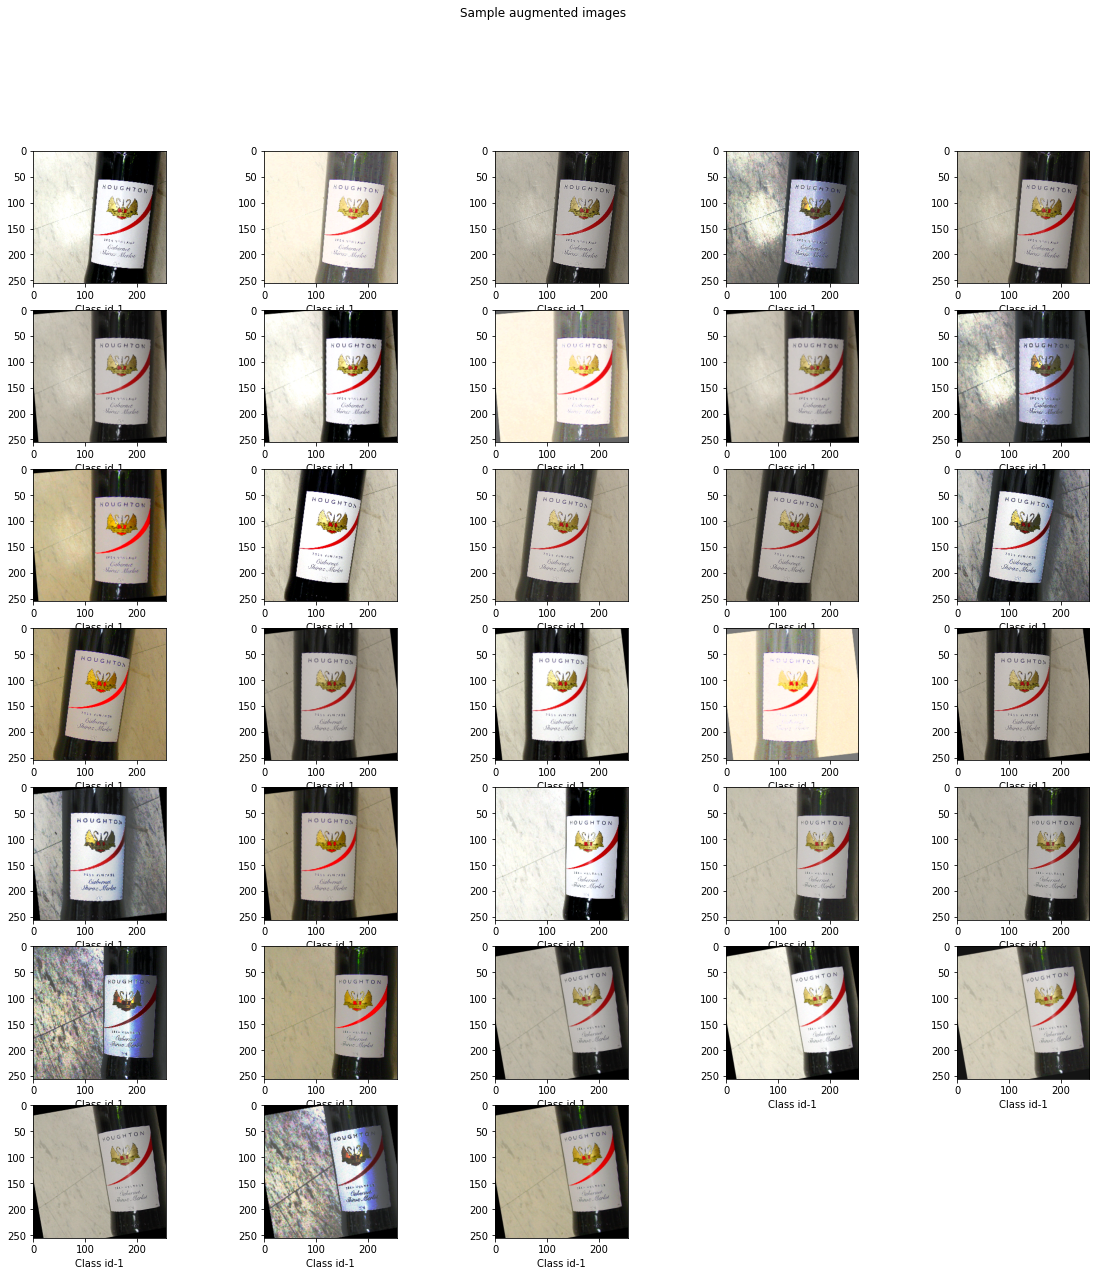

In [27]:
# plot 30 sample images
fig = plt.figure(figsize=(20,20))
fig.suptitle('Sample augmented images')
for i in range(33):
  fig.add_subplot(7,5,i+1)
  plt.imshow(aug_img[300+i])
  plt.xlabel(f'Class id-{aug_label[300+i]}')

**Train validation split**

* As dataset is very small, we are considering only train and validation set with shuffling

* We have cgoosen test_ratio = 0.083, i.e total 33 images are used for training for eah class, rest will be for test single image

In [30]:
train_img, valid_img, train_label, valid_label = train_test_split(aug_img,
                                                                  aug_label,
                                                                  stratify = aug_label,
                                                                  test_size = 0.0833,
                                                                  random_state = 42) 

In [42]:
print(f'Train set dimension and datatype {train_img.shape, train_img.dtype, train_label.shape, train_label.dtype}')
print(f'Validation set dimension {valid_img.shape, valid_img.dtype, valid_label.shape, valid_label.dtype}')

Train set dimension and datatype ((3300, 256, 256, 3), dtype('float32'), (3300,), dtype('int32'))
Validation set dimension ((300, 256, 256, 3), dtype('float32'), (300,), dtype('int32'))
